# Esercitazione 1


## Esercizio 1.01
L'esercizio 1.01 richiede di testare il generatore di numeri pseudo-casuali, verificando che i numeri estratti dal generatore obbediscano alla statistica.

### Punto 1
Nel punto 1 ho stimato il valor medio della distribuzione uniforme tra $[0,1)$. Ho estratto $M=10^6$ numeri pseudocasuali e ne ho stimato la media, con relativo errore, attraverso il metodo della media a blocchi ($N_{blocchi}=100$). Ho confrontato il valore ottenuto con il valore aspettato dall'integrale $\langle r \rangle = \int_0^1 r dr = 1/2$. La stima è entro $1\sigma_{mean}$ dal valore analitico.

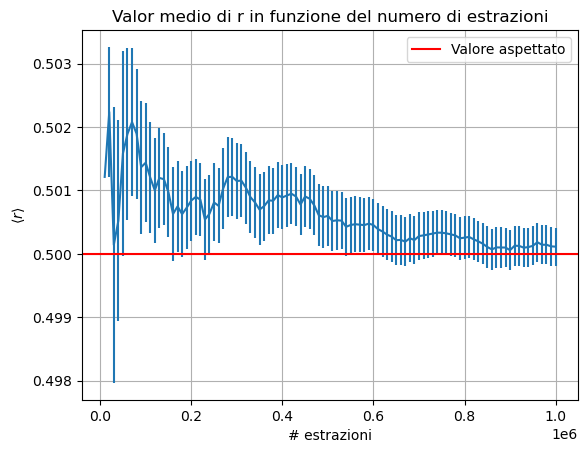

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
color_palette = sns.color_palette("bright")

x, sum, error = np.loadtxt("risultati/1011.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,sum,yerr=error)
plt.axhline(y=0.5, color="r", label="Valore aspettato")
plt.title('Valor medio di r in funzione del numero di estrazioni')
plt.xlabel('# estrazioni')
plt.ylabel(r'$\langle r \rangle $')
plt.grid(True)
plt.legend()
plt.show()

### Punto 2
Nel punto 2 ho stimato la varianza della distribuzione uniforme $[0,1)$. Analogamente al punto 1, ho estratto $M=10^6$ numeri pseudocasuali e ho stimato il valor medio della quantità $\left(r-1/2 \right)^2$, con relativo errore, attraverso il metodo della media a blocchi ($N_{blocchi}=100$). Ho confrontato il valore ottenuto con il valore aspettato dall'integrale $\sigma^2 = \int_0^1 \left(r-1/2 \right)^2 dr = 1/12$. La stima è entro $1\sigma_{mean}$ dal valore analitico.

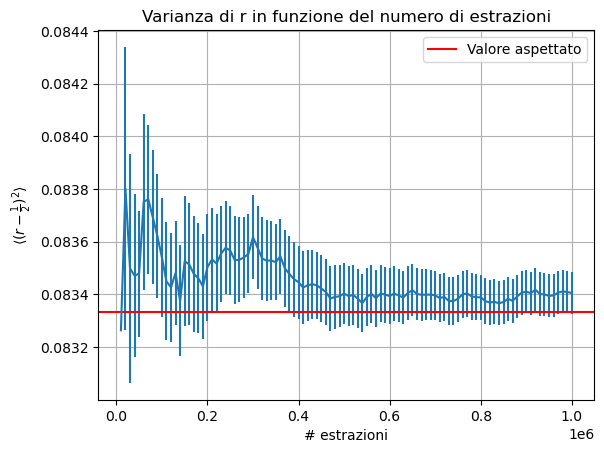

In [2]:
x, sum, error = np.loadtxt("risultati/1012.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,sum,yerr=error)
plt.axhline(y=1/12., color="r", label="Valore aspettato")
plt.title('Varianza di r in funzione del numero di estrazioni')
plt.xlabel('# estrazioni')
plt.ylabel(r'$\langle (r-\frac{1}{2})^2 \rangle$')
plt.grid(True)
plt.legend()
plt.show()

### Punto 3
Attraverso un test del chi quadro, ho valutato la probabilità che il mio campione sia estratto da una distribuzione uniforme. Ho simulato le $M=10^4$ estrazioni per $N_{\chi^2}=100$ volte, stimando di volta in volta il $\chi^2$ per ogni distribuzione. Dato che ho suddiviso l'intervallo $[0,1)$ in $100$ intervalli, mi aspetto un valore di $\chi^2\sim100$.

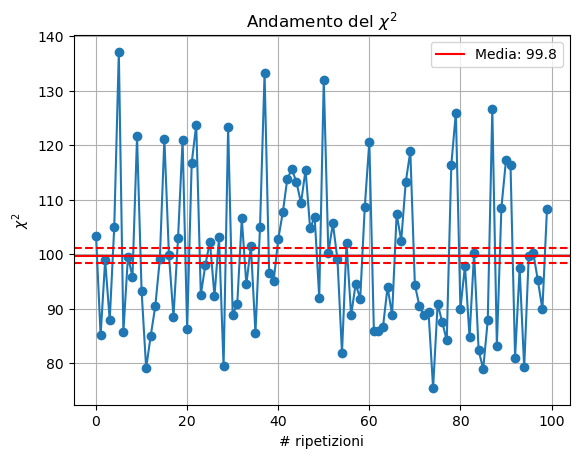

In [3]:
chi = np.loadtxt("risultati/1013.dat")
rep = np.arange(100)
media = np.mean(chi)
sigma = np.std(chi)

plt.plot(rep,chi, marker='o')
plt.title('Andamento del $\chi^2$')
plt.xlabel('# ripetizioni')
plt.ylabel('$\chi^2$')
plt.axhline(y=media, color="r", label="Media: "+str(round(media, 1)))
plt.axhline(y=media+sigma/10, color="r", linestyle='dashed')
plt.axhline(y=media-sigma/10, color="r", linestyle='dashed')
plt.legend()
plt.grid(True)
plt.show()

Come è possibile vedere dal grafico, il valore del $\chi^2$ oscilla molto. Tuttavia, la media dei vari $\chi^2_i$ è compatibile con 100. Ho costruito un istogramma con i valori del $\chi^2_i$ e l'ho confrontato con la distribuzione del chi quadro stesso, evincendo che i dati seguono effettivamente la distribuzione del $\chi^2$.

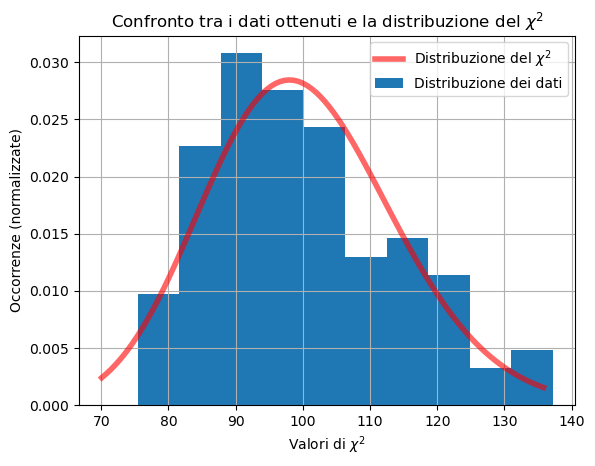

In [4]:
from scipy.stats import chi2
media=100

x_chi = np.linspace(chi2.ppf(0.01, media), chi2.ppf(0.99, media), 100)
plt.plot(x_chi, chi2.pdf(x_chi, media), lw=4, c='r', alpha=0.6, label='Distribuzione del $\chi^2$')
plt.hist(chi, density=1, label='Distribuzione dei dati')
plt.title('Confronto tra i dati ottenuti e la distribuzione del $\chi^2$')
plt.xlabel('Valori di $\chi^2$')
plt.ylabel('Occorrenze (normalizzate)')
plt.legend()
plt.grid(1)
plt.show()


## Esercizio 1.02 
Nell'esercizio 1.02 si richiede di testare il Teorema del Limite Centrale su diverse distribuzioni statistiche. Ho realizzato $N=100$ estrazioni di $M=10^4$ numeri casuali da diverse distribuzioni, e ho disegnato istogrammi con le occorrenze del valor medio $\mu=\frac{1}{N}\sum_{i=1}^N x_i$ per $N=1$, $N=2$, $N=10$, $N=100$ ripetizioni. Ho verificato che la distribuzione dei valori medi approssimava sempre più una distribuzione gaussiana (o lorentziana, per il dado lorentziano) all'aumentare di $N$. Per $N=100$ ho effettuato un fit gaussiano (o lorentziano).


### Distribuzione uniforme tra 0 e 1

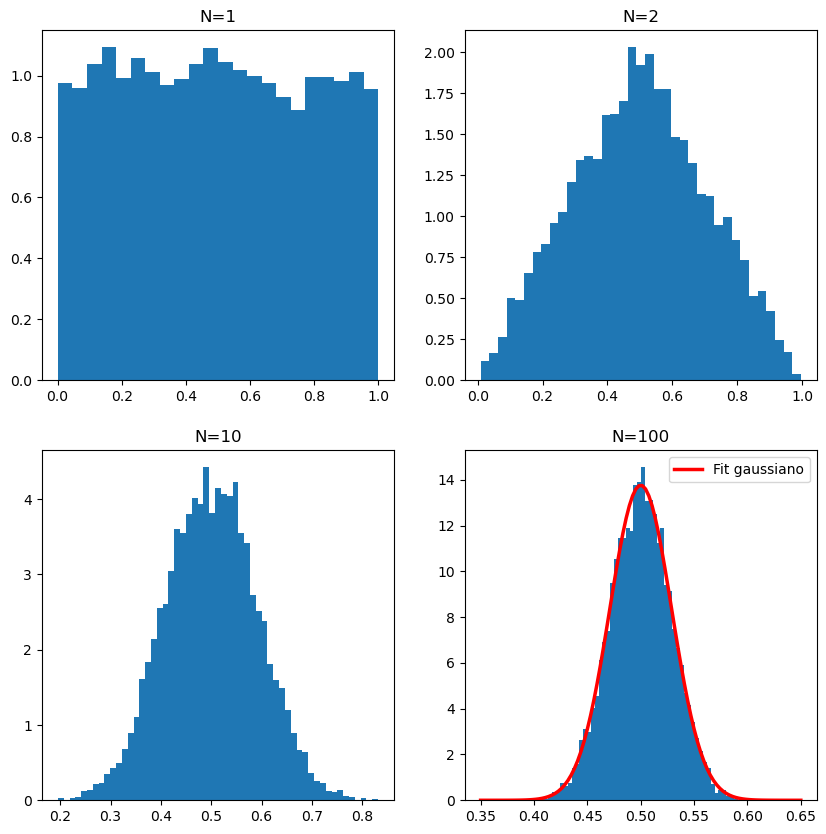

In [9]:
from scipy.stats import norm

uni1, uni2, uni10, uni100 = np.loadtxt("risultati/Uni.dat", usecols=(0,1,2,3), delimiter=',', unpack='true')
mu, sigma = norm.fit(uni100)
x = np.linspace(0.35, 0.65, 100)

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2,2, figsize=(10,10))
#fig.suptitle("Distribuzione uniforme tra 0 e 1", size=15)
ax0.hist(uni1, bins='auto', density=1)
ax0.set_title("N=1")
ax1.hist(uni2, bins='auto', density=1)
ax1.set_title("N=2")
ax2.hist(uni10, bins='auto', density=1)
ax2.set_title("N=10")
ax3.hist(uni100, bins='auto', density=1)
ax3.set_title("N=100")
ax3.plot(x, norm.pdf(x,mu,sigma), color = 'r', lw = 2.5, label='Fit gaussiano')
ax3.legend()
plt.show()

#print(r"Parametri del fit, (mu, sigma)=")
#(mu,sigma)

### Distribuzione esponenziale

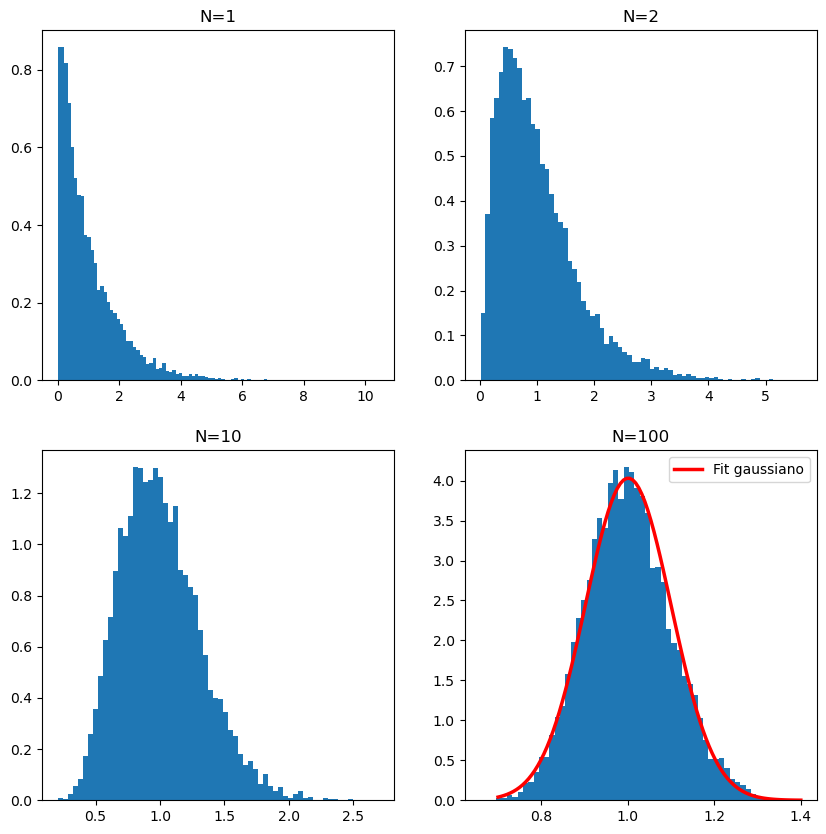

In [11]:
exp1, exp2, exp10, exp100 = np.loadtxt("risultati/Exp.dat", usecols=(0,1,2,3), delimiter=',', unpack='true')
mu, sigma = norm.fit(exp100)
x = np.linspace(0.7, 1.4, 100)

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2,2, figsize=(10,10))

ax0.hist(exp1, bins='auto', density=1)
ax0.set_title("N=1")
ax1.hist(exp2, bins='auto', density=1)
ax1.set_title("N=2")
ax2.hist(exp10, bins='auto', density=1)
ax2.set_title("N=10")
ax3.hist(exp100, bins='auto', density=1)
ax3.set_title("N=100")
ax3.plot(x, norm.pdf(x,mu,sigma), color = 'r', lw = 2.5, label='Fit gaussiano')
ax3.legend()
plt.show()

### Distribuzione lorentziana di $\mu=0$ e $\Gamma=1$

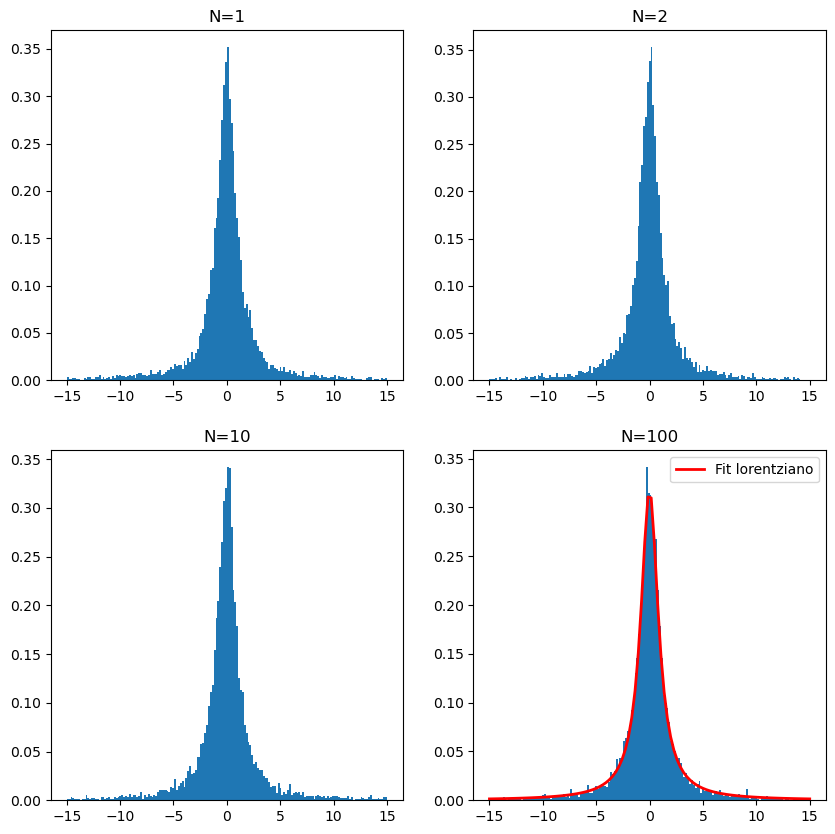

In [10]:
from scipy.stats import cauchy

lor1, lor2, lor10, lor100 = np.loadtxt("risultati/Lor.dat", usecols=(0,1,2,3), delimiter=',', unpack='true')
mu, gamma = cauchy.fit(lor100)
x = np.linspace(-15, 15, 100)

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2,2, figsize=(10,10))

ax0.hist(lor1, bins='auto', range=(-15,15), density=1)
ax0.set_title("N=1")
ax1.hist(lor2, bins='auto', range=(-15,15), density=1)
ax1.set_title("N=2")
ax2.hist(lor10, bins='auto', range=(-15,15), density=1)
ax2.set_title("N=10")
ax3.hist(lor100, bins='auto', range=(-15,15), density=1)
ax3.set_title("N=100")
ax3.plot(x, cauchy.pdf(x,mu,gamma), color = 'r', lw = 2, label='Fit lorentziano')
ax3.legend()
plt.show()

## Esercizio 1.03
L'esercizio 1.03 richiede di implementare il metodo stocastico dell'ago di Buffon per la stima di $\pi$. Ho simulato $M=10^6$ volte il lancio di un ago di lunghezza $l=0.4$ in un box di larghezza $d=1$, generando casualmente la posizione $0<x_0<d$ e l'inclinazione dell'ago, contando poi le volte $N$ in cui l'ago toccava o intersecava i bordi del box. La stima è stata calcolata come $\pi=\cfrac{2LM}{Nd}$. L'angolo di inclinazione è stato estratto con un metodo Accept-Reject, in modo da evitare di utilizzare il valore di $\pi$ per stimare il pi greco stesso. Il valore stimato e la sua incertezza sono stati ottenuti con il metodo della media a blocchi.

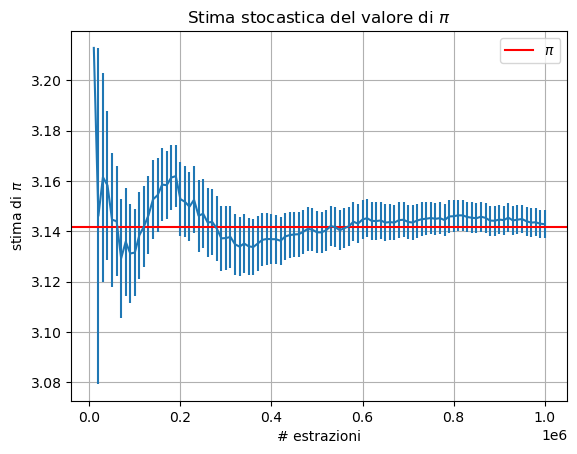

In [8]:
x, sum41, error = np.loadtxt("risultati/Buffon.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,sum41,yerr=error)
plt.axhline(y=math.pi, color="r", label='$\pi$')
plt.title('Stima stocastica del valore di $\pi$')
plt.xlabel('# estrazioni')
plt.ylabel(r'stima di $\pi$')
plt.grid(True)
plt.legend()
plt.show()